In [168]:
import numpy as np
import pandas as pd
from itertools import product
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter

test_shots = 1000
qubit_num = 2


In [169]:
def simulate(circuit, circuit_name, qubit_num, shots):
    state = Statevector.from_int(0, 2 ** qubit_num)
    state = state.evolve(circuit)
    # state.draw('latex')
    state.draw('qsphere', filename=f'{circuit_name}_state_qsphere.png')
    state.draw('hinton', filename=f'{circuit_name}_state_hinton.png')
    array_to_latex(state)

    meas = QuantumCircuit(qubit_num, qubit_num)
    meas.barrier(range(qubit_num))
    meas.measure(range(qubit_num), range(qubit_num))
    qc = meas.compose(circuit, range(qubit_num), front=True)
    qc.draw('mpl', filename=f'{circuit_name}_meas.png')

    backend = AerSimulator()
    qc_compiled = transpile(qc, backend)
    job_sim = backend.run(qc_compiled, shots=shots)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)
    print(counts)

    plot_histogram(counts, filename=f'{circuit_name}_hist.png')

## 1. Make four bell states with python quiskizit 
$\times$ 1000 shot （list out stats, like shot, probability...)

### 1.1 State 1
$\beta_{00}=\dfrac{1}{\sqrt{2}}(\ket{00}+\ket{11})$

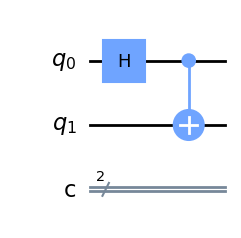

In [170]:
circ_b00 = QuantumCircuit(qubit_num, qubit_num)
circ_b00.h(0)
circ_b00.cx(0, 1)
circ_b00.draw('mpl')

In [171]:
simulate(circ_b00, './hw3_pic/b00', qubit_num, test_shots)

{'00': 525, '11': 475}


### 1.2 State 2
$\beta_{01}=\dfrac{1}{\sqrt{2}}(\ket{00}-\ket{11})$

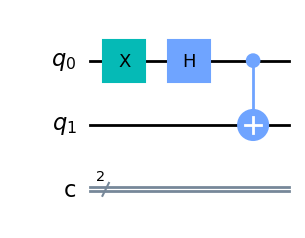

In [172]:
circ_b01 = QuantumCircuit(qubit_num, qubit_num)
circ_b01.x(0)
circ_b01.h(0)
circ_b01.cx(0, 1)
circ_b01.draw('mpl')

In [173]:
simulate(circ_b01, './hw3_pic/b01', qubit_num, test_shots)


{'00': 509, '11': 491}


### 1.2 State 3
$\beta_{10}=\dfrac{1}{\sqrt{2}}(\ket{10}+\ket{01})$

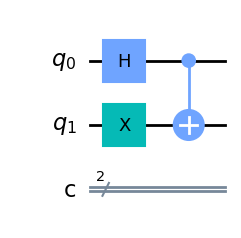

In [174]:
circ_b10 = QuantumCircuit(qubit_num, qubit_num)
circ_b10.x(1)
circ_b10.h(0)
circ_b10.cx(0, 1)
circ_b10.draw('mpl')

In [175]:
simulate(circ_b10, './hw3_pic/b10', qubit_num, test_shots)

{'10': 502, '01': 498}


### 1.2 State 4
$\beta_{11}=\dfrac{1}{\sqrt{2}}(\ket{10}-\ket{01})$

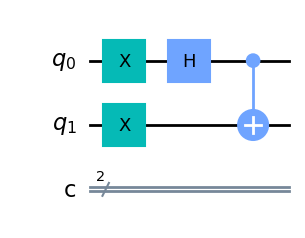

In [176]:
circ_b11 = QuantumCircuit(qubit_num, qubit_num)
circ_b11.x(0)
circ_b11.x(1)
circ_b11.h(0)
circ_b11.cx(0, 1)
circ_b11.draw('mpl')

In [177]:
simulate(circ_b11, './hw3_pic/b11', qubit_num, test_shots)

{'01': 482, '10': 518}
